# Understanding the Perceptron Learning Algorithm – Simple Explanation

## What is the Perceptron?

The **perceptron** is one of the earliest and simplest types of artificial neural networks. It was invented by **Frank Rosenblatt** in 1958. It’s used for **binary classification**, which means it learns to separate data into two classes, like:

- "Spam" or "Not Spam"
- "Cat" or "Dog"
- "Positive" or "Negative"

A perceptron works kind of like a decision-making calculator. It takes multiple inputs (features), multiplies them by some numbers (weights), adds a small extra value (bias), and then checks if the result is big enough to say “yes” (class +1) or “no” (class -1).

---

## What Does the Perceptron Algorithm Do?

The perceptron algorithm **learns** the best weights and bias to separate two kinds of data using a **straight line** (in 2D), **plane** (in 3D), or a **hyperplane** (in higher dimensions).

Here’s the idea:

1. Start with weights = 0 and bias = 0.
2. For each data point:
   - If it is **classified correctly**, do nothing.
   - If it is **wrong**, update the weights and bias.
3. Repeat until there are **no mistakes** (or until you hit a max number of attempts).

---

## What Does This Notebook Do?

This notebook shows the perceptron in action, with clear steps and live visualizations.

### Here’s what each step means:

1. **Import Libraries** – We use NumPy for math and Matplotlib for drawing.
2. **Define a Line** – This helps us draw the decision boundary (the line that separates the two classes).
3. **Plotting Function** – This draws the data, the line, and shows how learning progresses.
4. **Generate Data** – We create 100 random 2D points. Half are labeled as +1 (positive), and half as -1 (negative). These are made to be “linearly separable,” meaning we *can* draw a straight line to split them.
5. **Initialize the Perceptron** – We start with a blank model (weights = 0).
6. **Train the Model** – For each misclassified point, the perceptron learns by updating its weights. This gradually shifts the line to the correct position.
7. **Plot the Final Result** – We show the final decision boundary after training.

---

## Why is This Useful?

Understanding the perceptron helps you:

- Learn how neural networks make decisions
- Understand core machine learning concepts (like loss, weights, bias)
- Build toward more advanced models (like multilayer neural networks)

---

## Limitations of the Perceptron

- It only works if the data can be separated by a straight line.
- It doesn’t tell you *how confident* it is.
- More advanced models like SVMs or deep neural networks are needed for complex problems.

---

## Final Thoughts

This notebook is a great visual and hands-on way to learn about how machines can "learn" from mistakes and improve over time. Watching the line move and settle into place gives a strong intuition about what "training" really means in machine learning!



## Step 1: Import Libraries
We use NumPy for matrix operations and Matplotlib for plotting.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Define Line Equation
This function calculates the y-values for the decision boundary line given weights `w`, bias `b`, and x-values.

In [8]:
def line(w, b, x):
    return -b / w[1] - x * w[0] / w[1]

##  Step 3: Plotting Function
This function visualizes the dataset, decision boundary, and optionally highlights the current sample being updated.

In [9]:
def plot_data(X, y, w=None, b=None, sample_index=-1, iteration=None):
    plt.figure(figsize=(6, 6))

    pos = np.where(y == 1)
    neg = np.where(y == -1)

    # Plot positive and negative samples
    plt.plot(X[0, pos], X[1, pos], 'k+', label='Positive Class (+1)')
    plt.plot(X[0, neg], X[1, neg], 'ko', label='Negative Class (-1)')

    # Plot the decision boundary if weights are given
    if w is not None and b is not None:
        x_vals = np.linspace(-3, 3, 100)
        y_vals = line(w, b, x_vals)
        plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary')

    # Highlight the current sample being updated
    if sample_index >= 0:
        plt.plot(X[0, sample_index], X[1, sample_index], 'ro', markersize=10, fillstyle='none')

    if iteration is not None:
        plt.title(f'Iteration {iteration}', fontsize=14)

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.gca().set_aspect('equal', adjustable='box')

    #  Deduplicate legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.grid(True)
    plt.show()

## Step 4: Generate Separable Data
We create 100 data points, evenly split between +1 and -1 classes. The data is linearly separable using a margin `eta`.

In [10]:
import numpy as np

N = 100
eta = 0.2

w_true = np.array([[0.5], [-0.5]])  # true hyperplane weights
b_true = 0

X = []
y = []

while len(y) < N:
    x = np.random.randn(2, 1)
    score = float(w_true.T @ x + b_true)

    # Respect margin: only accept if it's confidently positive or negative
    if abs(score) > eta:
        label = 1 if score > 0 else -1
        X.append(x.flatten())
        y.append(label)

# Convert to numpy arrays
X = np.array(X).T  # Shape: (2, N)
y = np.array(y)

# Shuffle data and labels together
indices = np.random.permutation(N)
X = X[:, indices]
y = y[indices]

# Check balance
print("Positive labels:", np.sum(y == 1))
print("Negative labels:", np.sum(y == -1))

Positive labels: 52
Negative labels: 48


<ipython-input-10-87f1ad536561>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(w_true.T @ x + b_true)


##  Step 5: Initialize Perceptron
We start with zero weights and zero bias. We also define the learning rate and number of training epochs.

In [11]:
w = np.zeros((2,))
b = 0.0
learning_rate = 1.0
max_epochs = 20

## Step 6: Train the Perceptron
For each misclassified point, we update the weights and bias. The training stops if there are no errors in an epoch.

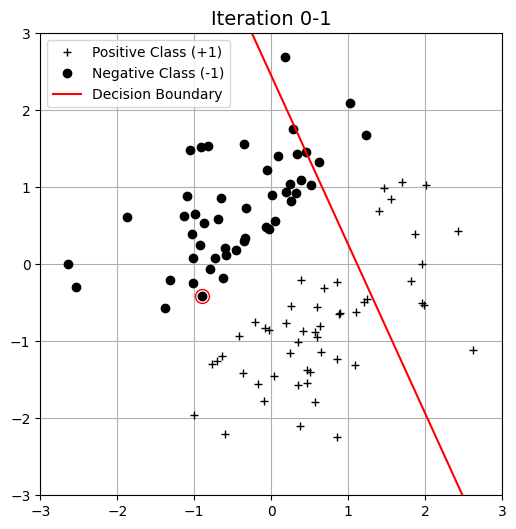

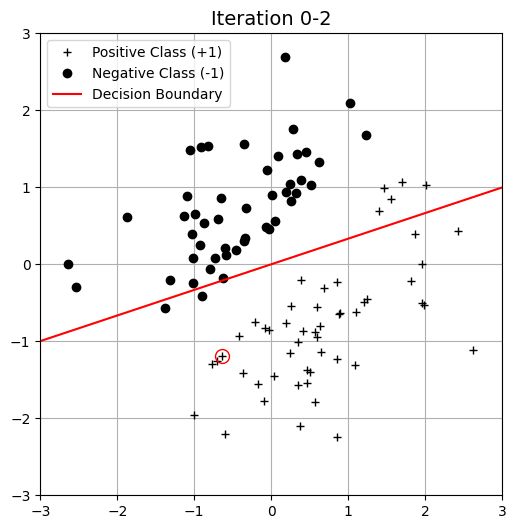

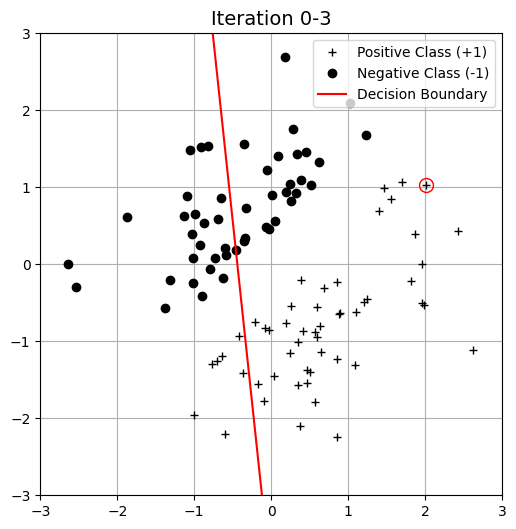

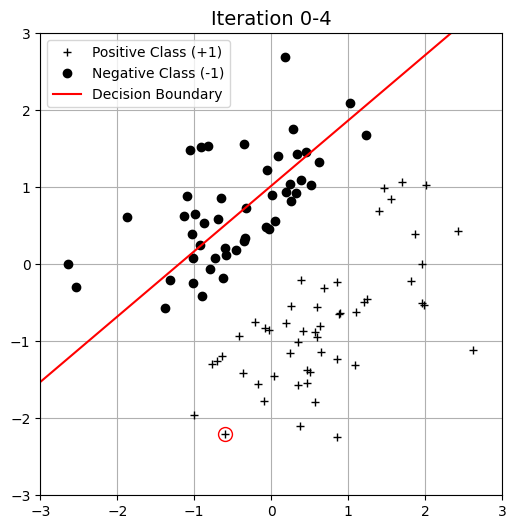

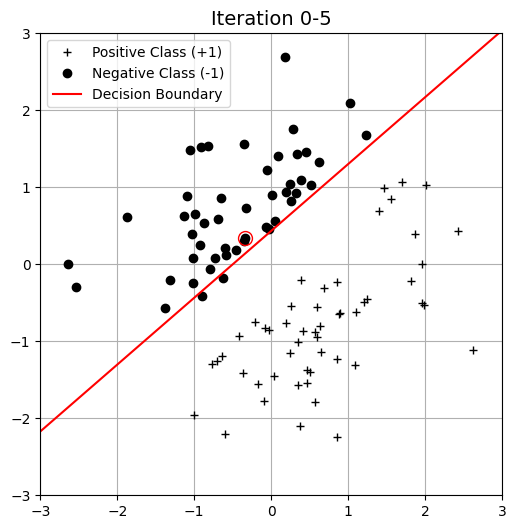

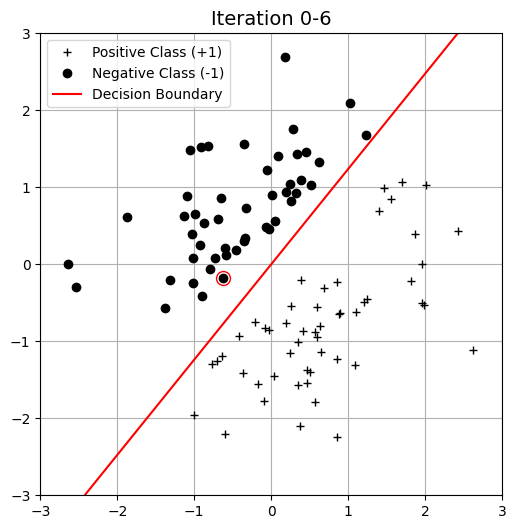

Converged in epoch 1


In [12]:
for epoch in range(max_epochs):
    errors = 0
    for i in range(N):
        x_i = X[:, i]
        y_i = y[i]
        activation = np.dot(w, x_i) + b
        if y_i * activation <= 0:
            # Misclassified → update
            w += learning_rate * y_i * x_i
            b += learning_rate * y_i
            errors += 1
            plot_data(X, y, w, b, sample_index=i, iteration=f"{epoch}-{errors}")
    if errors == 0:
        print(f"Converged in epoch {epoch}")
        break

## Step 7: Final Model
We visualize the final decision boundary after training completes.

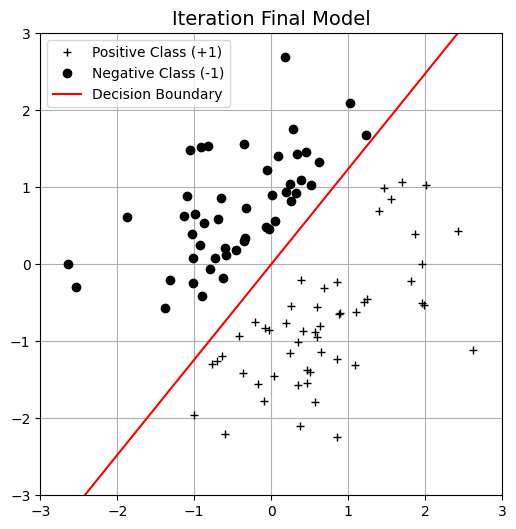

In [13]:
plot_data(X, y, w, b, iteration="Final Model")

# Multi Layer Perceptron

** Step 1: Generate Data**

- We create a dataset of 1000 random 2-dimensional points (think of them as (X, Y) coordinates).
- Each point is assigned a label (y) based on a simple rule:
    - **y = 1** if both X and Y have the same sign (both positive or both negative).
    - **y = 0** otherwise (one is positive and the other is negative).
- This essentially labels points in the top-right and bottom-left quadrants as 1, and those in the top-left and bottom-right as 0.

** Step 2: Split Data**

- The generated data is divided into two distinct sets:
    - **Training data:** This portion is used to train the neural network, allowing it to learn the underlying relationship between the input points and their labels.
    - **Test data:** This separate portion is used to evaluate the performance of the trained network on unseen data. It helps us determine if the network has generalized the learning or simply memorized the training examples.

** Step 3: Define Activation Functions**

- Activation functions are mathematical formulas applied within the neurons of a neural network to introduce non-linearity and enable the learning of complex patterns. We define the following common activation functions and their derivatives (which are crucial for the training process):
    - **Sigmoid:**
        - Formula: $\sigma(x) = \frac{1}{1 + e^{-x}}$
        - Derivative: $\sigma'(x) = \sigma(x)(1 - \sigma(x))$
        - Functionality: Squashes the output of a neuron to a range between 0 and 1.
    - **Tanh (Hyperbolic Tangent):**
        - Formula: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
        - Derivative: $\tanh'(x) = 1 - \tanh^2(x)$
        - Functionality: Similar to sigmoid but outputs values between -1 and 1.
    - **ReLU (Rectified Linear Unit):**
        - Formula: $ReLU(x) = \max(0, x)$
        - Derivative: $ReLU'(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x \le 0 \end{cases}$
        - Functionality: Outputs the input directly if it's positive, otherwise outputs 0.

** Step 4: Loss and Accuracy**

- **Loss Function:** This function quantifies the error between the network's predictions and the actual labels in the data. A higher loss value indicates a greater discrepancy and a less accurate model. The goal of training is to minimize this loss.
- **Accuracy:** This metric measures the percentage of correctly classified examples by the network. It provides a straightforward way to understand the overall performance of the model. Both loss and accuracy are essential for monitoring the training progress and evaluating the final model.

## Step 5: Build the MLP (Multi-Layer Perceptron)

This step details the architecture and the fundamental processes of our neural network.

**1. Weights and Biases (W1, b1, W2, b2)**

In a neural network, weights and biases are the learnable parameters that dictate the network's behavior.

-   **Weights (W1, W2):**
    -   These are multiplicative factors applied to the inputs of neurons.
    -   They determine the influence of each input on the subsequent layer.
    -   Weights are adjusted during the training process.

-   **Biases (b1, b2):**
    -   These are additive terms combined with the weighted sum of inputs.
    -   Biases enable the network to make predictions even when all input values are zero.
    -   They allow for shifting the activation function's threshold.

    *Analogy:* Think of tuning a radio. The weights are like adjusting the antenna's sensitivity to different frequencies, and the bias is like the fine-tuning knob that centers the signal.

**2. `forward()` — Passing Input Through the Network to Get Predictions**

The forward pass is the process of feeding input data through the network's layers to generate an output prediction.

-   **Layer 1 (Input to Hidden):**
    -   The input data (X) is multiplied by the weights of the first layer (W1), and the bias (b1) is added. This results in the weighted sum $Z_1$:
        $$Z_1 = W_1 \cdot X + b_1$$
    -   An activation function (e.g., tanh or sigmoid) is then applied element-wise to $Z_1$ to introduce non-linearity, producing the activation $A_1$:
        $$A_1 = \text{activation\_function}(Z_1)$$
    -   This non-linearity allows the network to learn complex, non-linear relationships in the data.

-   **Layer 2 (Hidden to Output):**
    -   The output from the first layer ($A_1$) becomes the input to the second layer. It's multiplied by the second layer's weights (W2), and the bias (b2) is added, resulting in $Z_2$:
        $$Z_2 = W_2 \cdot A_1 + b_2$$
    -   Finally, a sigmoid activation function is applied to $Z_2$ to produce the final prediction $A_2$, which represents the probability of the input belonging to class 1:
        $$A_2 = \sigma(Z_2) = \frac{1}{1 + e^{-Z_2}}$$

    *Formula Recap:*
    $$Z_1 = W_1 \cdot X + b_1$$
    $$A_1 = \text{activation\_function}(Z_1)$$
    $$Z_2 = W_2 \cdot A_1 + b_2$$
    $$A_2 = \sigma(Z_2) \quad \text{(final prediction)}$$

**3. `backward()` — Adjusting the Weights with Backpropagation**

Backpropagation is the crucial process of calculating the gradients of the loss function with respect to the network's weights and biases, and then using these gradients to update the parameters in a way that minimizes the loss.

-   **Loss:** The loss function quantifies the discrepancy between the network's prediction ($A_2$) and the true label ($y$). A common loss function for binary classification is binary cross-entropy:
    $$Loss = - \sum [y \cdot \log(A_2) + (1 - y) \cdot \log(1 - A_2)]$$
    This function penalizes the network more when it's confidently wrong.

-   **Gradient Descent:** Backpropagation is an application of gradient descent. We calculate how much the loss changes with respect to each weight and bias (the gradients). These gradients indicate the direction in which the parameters should be adjusted to reduce the loss.

-   **Steps for Backpropagation:**
    1.  **Calculate Gradients:** Using the chain rule of calculus, we compute the partial derivatives of the loss function with respect to each weight and bias in the network (e.g., $\frac{\partial Loss}{\partial W_1}$, $\frac{\partial Loss}{\partial b_1}$, $\frac{\partial Loss}{\partial W_2}$, $\frac{\partial Loss}{\partial b_2}$). These gradients tell us the sensitivity of the loss to changes in each parameter.
    2.  **Update Weights:** The weights and biases are updated iteratively by subtracting a small fraction of their respective gradients. This fraction is determined by the learning rate ($\alpha$).

        *Gradient Descent Rule:*
        $$W_1 = W_1 - \alpha \cdot \frac{\partial Loss}{\partial W_1}$$
        $$b_1 = b_1 - \alpha \cdot \frac{\partial Loss}{\partial b_1}$$
        $$W_2 = W_2 - \alpha \cdot \frac{\partial Loss}{\partial W_2}$$
        $$b_2 = b_2 - \alpha \cdot \frac{\partial Loss}{\partial b_2}$$

    *Why Adjust Weights?* The goal is to iteratively refine the weights and biases so that the network's predictions become increasingly aligned with the true labels, thereby minimizing the loss.

**4. `train()` — Training the Model Over Multiple Epochs**

Training involves repeatedly exposing the network to the training data and performing the forward and backward passes to optimize the weights and biases.

-   **Epoch:** One complete pass through the entire training dataset.

-   **Training Process:**
    -   For a specified number of epochs:
        1.  The model performs a **forward pass** on the training data to generate predictions.
        2.  The **loss** between the predictions and the true labels is calculated.
        3.  **Backpropagation** is performed to compute the gradients of the loss with respect to the weights and biases.
        4.  The weights and biases are **updated** using the calculated gradients and the learning rate.
        5.  The **accuracy** on the training data is often tracked to monitor progress.

-   Repeating this process over many epochs allows the network to gradually learn the underlying patterns in the data and improve its predictive capabilities.

**5. `predict()` — Using the Trained Model to Make Predictions**

Once the training process is complete, the learned weights and biases can be used to make predictions on new, unseen data.

-   **Prediction Process:**
    1.  A new input is fed into the **forward pass** of the trained network.
    2.  The network processes the input through its layers using the learned weights and biases.
    3.  The final output ($A_2$) is a probability between 0 and 1.
    4.  A **threshold** (e.g., 0.5) is typically used to classify the output into class 1 (if $A_2 \ge 0.5$) or class 0 (if $A_2 < 0.5$).

## Step 6: Try Many Combinations**

To find the optimal hyperparameters for our model, we will experiment with different activation functions and learning rates.

-   **Activation Functions:** We will test the following:
    -   Sigmoid
    -   Tanh
    -   ReLU

-   **Learning Rates:** We will explore a range of learning rates:
    ```
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
    ```
    -   A **low learning rate** can lead to slow convergence, requiring many epochs to learn.
    -   A **high learning rate** can cause the training to be unstable, potentially overshooting the optimal parameter values.

-   **Experimentation:** For each combination of activation function and learning rate:
    1.  A new MLP model will be initialized.
    2.  The model will be trained on the training data for a fixed number of epochs.
    3.  The **average training accuracy** achieved during training will be recorded.
    4.  The trained model will be evaluated on the **test data** to assess its generalization performance, and the test accuracy will be recorded.

## Step 7: Print the Results**

Finally, the results from all the experiments will be compiled and presented.

-   The combinations of activation function and learning rate will be ranked based on their **test accuracy**.
-   The combination that yields the highest test accuracy will be identified as the best performing set of hyperparameters for this specific problem.

In [6]:
import numpy as np

np.random.seed(42)

# Generate synthetic data
X = np.random.randn(2, 1000)
y = (X[0] * X[1] > 0).astype(int).reshape(1, -1)

# Train-test split
train_size = int(0.8 * X.shape[1])
X_train, X_test = X[:, :train_size], X[:, train_size:]
y_train, y_test = y[:, :train_size], y[:, train_size:]

# Activation functions
def sigmoid(z): return 1 / (1 + np.exp(-z))
def sigmoid_derivative(z): s = sigmoid(z); return s * (1 - s)

def tanh(z): return np.tanh(z)
def tanh_derivative(z): return 1 - np.tanh(z) ** 2

def relu(z): return np.maximum(0, z)
def relu_derivative(z): return (z > 0).astype(float)

# Utility
def compute_loss(y_true, y_pred):
    m = y_true.shape[1]
    epsilon = 1e-15
    return -np.sum(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon)) / m

def compute_accuracy(y_true, y_pred):
    preds = (y_pred > 0.5).astype(int)
    return np.mean(preds == y_true) * 100

# MLP class
class MLP:
    def __init__(self, input_size, hidden_size, learning_rate, activation, activation_deriv):
        self.learning_rate = learning_rate
        self.activation = activation
        self.activation_deriv = activation_deriv
        self.W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(1, hidden_size) * np.sqrt(2. / hidden_size)
        self.b2 = np.zeros((1, 1))

    def forward(self, X):
        self.Z1 = self.W1 @ X + self.b1
        self.A1 = self.activation(self.Z1)
        self.Z2 = self.W2 @ self.A1 + self.b2
        self.A2 = sigmoid(self.Z2)  # Output layer is always sigmoid
        return self.A2

    def backward(self, X, y):
        m = X.shape[1]
        dZ2 = self.A2 - y
        dW2 = (dZ2 @ self.A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        dA1 = self.W2.T @ dZ2
        dZ1 = dA1 * self.activation_deriv(self.Z1)
        dW1 = (dZ1 @ X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=1000):
        acc_list = []
        for epoch in range(1, epochs + 1):
            y_pred = self.forward(X)
            acc = compute_accuracy(y, y_pred)
            acc_list.append(acc)
            self.backward(X, y)
        return acc_list

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)

# Configurations
activations = {
    'sigmoid': (sigmoid, sigmoid_derivative),
    'tanh': (tanh, tanh_derivative),
    'relu': (relu, relu_derivative),
}
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

# Run experiments
results = []

for name, (act_fn, act_deriv) in activations.items():
    for lr in learning_rates:
        mlp = MLP(input_size=2, hidden_size=10, learning_rate=lr,
                  activation=act_fn, activation_deriv=act_deriv)
        acc_list = mlp.train(X_train, y_train, epochs=1000)
        avg_train_acc = np.mean(acc_list)
        test_acc = compute_accuracy(y_test, mlp.predict(X_test))
        results.append((name, lr, avg_train_acc, test_acc))
        print(f"Activation: {name:7s}, LR: {lr:<5}, Avg Train Acc: {avg_train_acc:.2f}%, Final Test Acc: {test_acc:.2f}%")

# Summary
print("\nSummary (sorted by test accuracy):")
results.sort(key=lambda x: x[3], reverse=True)
for name, lr, avg_train, test in results:
    best = "✅" if test == results[0][3] else "  "
    print(f"{best}Activation: {name:7s}, LR: {lr:<5}, Train Acc: {avg_train:.2f}%, Test Acc: {test:.2f}%")


Activation: sigmoid, LR: 0.001, Avg Train Acc: 50.89%, Final Test Acc: 56.00%
Activation: sigmoid, LR: 0.005, Avg Train Acc: 54.51%, Final Test Acc: 47.50%
Activation: sigmoid, LR: 0.01 , Avg Train Acc: 40.41%, Final Test Acc: 31.50%
Activation: sigmoid, LR: 0.05 , Avg Train Acc: 56.21%, Final Test Acc: 52.50%
Activation: sigmoid, LR: 0.1  , Avg Train Acc: 66.07%, Final Test Acc: 63.50%
Activation: sigmoid, LR: 0.5  , Avg Train Acc: 85.33%, Final Test Acc: 97.00%
Activation: tanh   , LR: 0.001, Avg Train Acc: 47.78%, Final Test Acc: 44.50%
Activation: tanh   , LR: 0.005, Avg Train Acc: 53.54%, Final Test Acc: 55.00%
Activation: tanh   , LR: 0.01 , Avg Train Acc: 65.57%, Final Test Acc: 67.50%
Activation: tanh   , LR: 0.05 , Avg Train Acc: 81.87%, Final Test Acc: 93.00%
Activation: tanh   , LR: 0.1  , Avg Train Acc: 87.18%, Final Test Acc: 93.50%
Activation: tanh   , LR: 0.5  , Avg Train Acc: 96.24%, Final Test Acc: 98.00%
Activation: relu   , LR: 0.001, Avg Train Acc: 42.58%, Final Tes